# **GeoCLIP Demo:** Worldwide Image Geo-localization 🌎📍

## Setting Up Your Environment 🛠️

To ensure a much faster inference, please follow these steps to use a GPU runtime:

1. Go to the menu at the top of this notebook, and select `Runtime` > `Change runtime type`.
2. Under `Hardware accelerator`, select `GPU` and click `Save`.
3. You can verify the GPU allocated to this session by running the following cell:

In [5]:
import torch

# if not torch.cuda.is_available():
#     raise RuntimeError("This notebook requires a GPU to run. Please ensure that you have selected GPU as the Hardware accelerator in the Runtime settings.")
# else:
#     print("CUDA is available. You're good to go!")

## Installation 📦

## Importing Libraries and Model Initialization 🛠️

In [ ]:
from geoclip import GeoCLIP

model = GeoCLIP().to("cpu")
print("===========================")
print("GeoCLIP has been loaded! 🎉")
print("===========================")

AttributeError: 'BitImageProcessor' object has no attribute 'to'

In [3]:
# Image Upload & Display
from PIL import Image
from io import BytesIO
# from google.colab import files
import matplotlib.pyplot as plt

# Heatmap
import folium
from folium.plugins import HeatMap

## Uploading an Image 🌃

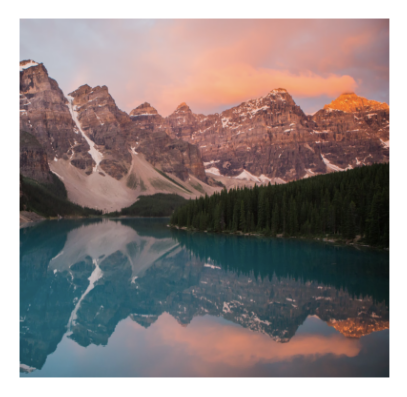

In [ ]:
# # uploaded = files.upload()

# if uploaded:
#     # Read Image
#     image_name = next(iter(uploaded))
#     image_path = BytesIO(uploaded[image_name])

#     print(f"Image {image_name} uploaded successfully!")

#     # Show Image
#     image = Image.open(image_path)
#     plt.figure(figsize=(5, 5))
#     plt.imshow(image)
#     plt.axis('off')
#     plt.show()
# else:
#     print("No image uploaded. Please try again.")

image = Image.open("download.png")
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

## Making Predictions 🗺️📍

In [ ]:
# Make predictions
top_pred_gps, top_pred_prob = model.predict("download.png", top_k=50)

# Display the top 5 GPS predictions
print("Top 5 GPS Predictions 📍")
print("========================")
for i in range(5):
    lat, lon = top_pred_gps[i]
    print(f"Prediction {i+1}: ({lat:.6f}, {lon:.6f}) - Probability: {top_pred_prob[i]:.6f}")

## Visualize Heatmap 🌎 🔍

In [ ]:
# Set top coordinates to plot the heatmap (<= top_k)
top_n_coordinates = 10

gps_coordinates = top_pred_gps.tolist()[:top_n_coordinates]
probabilities = top_pred_prob.tolist()[:top_n_coordinates]

total_prob = sum(probabilities)
normalized_probs = [prob / total_prob for prob in probabilities]

# Combine coordinates with normalized probabilities
weighted_coordinates = [(lat, lon, weight) for (lat, lon), weight in zip(gps_coordinates, normalized_probs)]

# Calculate the average location to center the map
avg_lat = sum(lat for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)
avg_lon = sum(lon for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)

# Create a map centered around the average coordinates
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=2.2)

# Define the color gradient
magma = {
    0.0: '#932667',
    0.2: '#b5367a',
    0.4: '#d3466b',
    0.6: '#f1605d',
    0.8: '#fd9668',
    1.0: '#fcfdbf'
}

HeatMap(weighted_coordinates, gradient=magma).add_to(m)

# Mark top coordinate
top_coordinate = gps_coordinates[0]
top_probability = normalized_probs[0]

folium.Marker(
    location=top_coordinate,
    popup=f"Top Prediction: {top_coordinate} with probability {top_probability:.4f}",
    icon=folium.Icon(color='orange', icon='star')
).add_to(m)

# Display the map
m

## Want to learn more? 📚

Check out our [paper](https://arxiv.org/abs/2309.16020v2) and [GitHub repository](https://github.com/VicenteVivan/geo-clip) for more details!

### Citation
If you find GeoCLIP useful in your research, please consider citing:

```bibtex
@article{cepeda2023geoclip,
  title={GeoCLIP: Clip-Inspired Alignment between Locations and Images for Effective Worldwide Geo-localization},
  author={Vivanco, Vicente and Nayak, Gaurav Kumar and Shah, Mubarak},
  booktitle={Advances in Neural Information Processing Systems (NeurIPS)},
  year={2023}
}
